In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Analisis PCA.xlsx to Analisis PCA (4).xlsx


In [ ]:
filename = list(uploaded.keys())[0]

In [ ]:
if filename.endswith('.xlsx'):
    df_excel = pd.read_excel(filename)

    muestras = df_excel.iloc[1, 2:].values
    variables = df_excel.iloc[2:, 1].values
    data = df_excel.iloc[2:, 2:].values.astype(float)

    df = pd.DataFrame(data.T, columns=variables, index=muestras)
    variables_a_mostrar = ['pH', 'Turbidez Total (NTU)', 'SO2 Combinado (mg/L)', 'Acidez Total', 'Turbidez Fría (NTU)',
                       'Viscoc. de Oswald (cP)', 'Altura (mAU)', 'Fenoles (FT)', 'Capacidad Antioxidnte (DPPH)', 'Turbidez Ambiente (NTU)',
                       '(RMF) 3-Furanmethanol', 'CIELab h', '°Brix Correg.', '(MF) Propoxur ','CIELab b*', 'CIELab a*', 'Tensión Superficial (mN/m)',
                           'Velocidad de Espumado (cm/seg)', '(MF) 2-Naphthalenol','Metales Pesados (Fe)', 'Metales Pesados (Zn)','Capacidad Antioxidnte (DPPH)','Levaduras (UFC/cm3)',
                           '(RMF) Propoxur ']

elif filename.endswith('.csv'):
    df_csv = pd.read_csv(filename, encoding='latin1', sep=';')

    for col in df_csv.columns[1:]:
        df_csv[col] = df_csv[col].astype(str).str.replace(',', '.').astype(float)

    df_csv.set_index('ANALISIS', inplace=True)
    df = df_csv.T
    variables_a_mostrar = ['pH', 'Turbidez Total (NTU)', 'SO2 Combinado (mg/L)', 'Acidez Total', 'Turbidez Fría (NTU)',
                       'Viscoc. de Oswald (cP)', 'Altura (mAU)', 'Fenoles (FT)', 'Capacidad Antioxidnte (DPPH)', 'Turbidez Ambiente (NTU)',
                       '(RMF) 3-Furanmethanol', 'CIELab h', '°Brix Correg.', '(MF) Propoxur ','CIELab b*', 'CIELab a*', 'Tensión Superficial (mN/m)',
                           'Velocidad de Espumado (cm/seg)', '(MF) 2-Naphthalenol','Metales Pesados (Fe)', 'Metales Pesados (Zn)','Capacidad Antioxidnte (DPPH)','Levaduras (UFC/cm3)',
                           '(RMF) Propoxur ']
else:
    raise ValueError("Formato no soportado. Usa .xlsx o .csv")


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
pca = PCA(n_components=5)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, index=df.index, columns=[f'PC{i+1}' for i in range(5)])

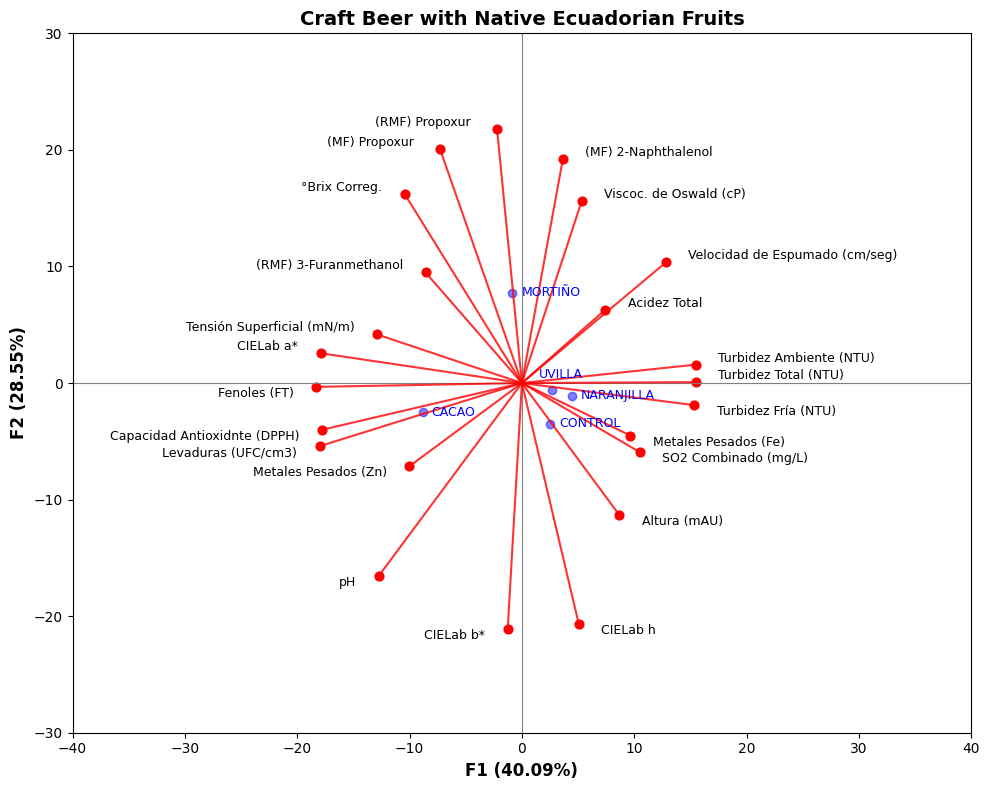

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.axhline(0, color='gray', linewidth=0.8)
ax.axvline(0, color='gray', linewidth=0.8)

# Puntos de las muestras
for i in range(pca_df.shape[0]):
    x = pca_df.iloc[i, 0]
    y = pca_df.iloc[i, 1]
    label = pca_df.index[i]

    ax.scatter(x, y, color='blue', alpha=0.5)

    # Posiciones personalizadas para las muestras
    if label == 'UVILLA':
        ax.text(x + 0.8, y + 0.8, label, fontsize=9, color='blue', ha='center', va='bottom')  # Encima
    #elif label == 'NARANJILLA':
        #ax.text(x, y - 0.5, label, fontsize=9, color='blue', ha='center', va='top')  # Debajo
    else:
        ax.text(x + 0.8, y, label, fontsize=9, color='blue', ha='left', va='center')  # Por defecto

# Vectores de carga
loadings = pca.components_.T[:, :2]
for i, feature in enumerate(df.columns):
    if feature in variables_a_mostrar:  # Asegurarse de que las variables estén en la lista
        arrow_x = loadings[i, 0] * 90
        arrow_y = loadings[i, 1] * 90

        # Línea desde el origen hasta el punto de carga
        ax.plot([0, arrow_x], [0, arrow_y], color='red', alpha=0.8, linewidth=1.5)

        # Punto rojo al final de la flecha
        ax.scatter(arrow_x, arrow_y, color='red', s=40)

        # Dirección del texto
        if arrow_x > 0 and arrow_y > 0:  # Cuadrante I (derecha y arriba)
            ha = 'left'
            va = 'bottom'
            text_x = arrow_x + 2
            text_y = arrow_y
        elif arrow_x < 0 and arrow_y > 0:  # Cuadrante II (izquierda y arriba)
            ha = 'right'
            va = 'bottom'
            text_x = arrow_x - 2
            text_y = arrow_y
        elif arrow_x < 0 and arrow_y < 0:  # Cuadrante III (izquierda y abajo)
            ha = 'right'
            va = 'top'
            text_x = arrow_x - 2
            text_y = arrow_y
        else:  # Cuadrante IV (derecha y abajo)
            ha = 'left'
            va = 'top'
            text_x = arrow_x + 2
            text_y = arrow_y

        # Etiqueta sin guiones y ajustada
        ax.text(text_x, text_y, feature, color='black', ha=ha, va=va, fontsize=9)

# Ejes y estética
ax.set_xlabel(f'F1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=12, fontweight='bold')
ax.set_ylabel(f'F2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=12, fontweight='bold')
ax.set_xlim(-40, 40)  # Ajustar si es necesario
ax.set_ylim(-30, 30)  # Ajustar si es necesario
ax.set_title('Craft Beer with Native Ecuadorian Fruits', fontsize=14, fontweight='bold')
ax.grid(False)
plt.tight_layout()
plt.show()




---

